# Estatística com Pyhton: Frequência e Medidas
Curso elaborado pela plataforma Alura.com.

## 1. Qual seu tipo de dados?
Como objeto de estudo a fim de consolidarmos os conhecimentos de estatística, vamos utilizar um conjunto de dados extraído do IBGE (PNAD).

### 1.1. Extraindo a Base de Dados

In [0]:
import pandas as pd

In [0]:
%run /datalake_functions/StorageConnector

In [0]:
%run /datalake_functions/Utils

Notebook Utils associated with success!

Out[146]: <function __main__._calc_std_sas(colunas: list)>

In [0]:
ABFS_PATH = getABFS(storage_account='stomktanalyticsprod',container='stomktanalyticsprod')
ABFS_PATH_temp = getABFS(storage_account='stomktanalyticsprod',container='databricksmetadata')
ABFS_SHARED = getABFS(storage_account='stomktanalyticsprod',container='shared')
NOTEBOOK_NAME = "Estatística com Python: Frequências e Medidas"

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2413148571939877> in <module> 
 ----> 1 ABFS_PATH = getABFS ( storage_account = 'stomktanalyticsprod' , container = 'stomktanalyticsprod' ) 
 2 ABFS_PATH_temp = getABFS ( storage_account = 'stomktanalyticsprod' , container = 'databricksmetadata' ) 
 3 ABFS_SHARED = getABFS ( storage_account = 'stomktanalyticsprod' , container = 'shared' ) 
 4 NOTEBOOK_NAME = "Estatística com Python: Frequências e Medidas" 

 NameError : name 'getABFS' is not defined

In [0]:
df = (spark.read
.options(header=True)
.option("encoding", "ISO-8859-1")
.option("sep", ";")
.csv(ABFS_PATH + "/Gabriel_Oliveira/DadosAlura2",inferSchema=True)
)
df.createOrReplaceTempView("DadosAlura2")

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2413148571939879> in <module> 
 3 . option ( "encoding" , "ISO-8859-1" ) 
 4 . option ( "sep" , ";" ) 
 ----> 5 . csv ( ABFS_PATH + "/Gabriel_Oliveira/DadosAlura2" , inferSchema = True ) 
 6 )
 7 df . createOrReplaceTempView ( "dadosAlura1" ) 

 NameError : name 'ABFS_PATH' is not defined

In [0]:
dados = df.toPandas() #Transformando os dados do Spark em um formato que o Pandas consegue trabalhar
dados #Mostrando os dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [0]:
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### 1.2. Tipos de Dados
Podemos dividir as variáveis em dois tipos de dados:
1. Qualiativo: Aqueles não numéricos que se referem a qualidades dos objetos (UF, Sexo, Cor)
2. Quantitativo: Aqueles numéricos que podem ser expressados por quantidades (renda, idade, altura)

In [0]:
dados.columns

Out[157]: Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [0]:
dados[['UF','Sexo','Cor']] #Observe que os dados estão codificados

,UF,Sexo,Cor
0,11,0,8
1,11,1,2
2,11,1,8
3,11,0,2
4,11,1,8
...,...,...,...
76835,53,1,2
76836,53,0,4
76837,53,0,8
76838,53,0,8


In [0]:
dados[['Idade', 'Anos de Estudo', 'Renda', 'Altura']]

,Idade,Anos de Estudo,Renda,Altura
0,23,12,800,1.603808
1,23,12,1150,1.739790
2,35,15,880,1.760444
3,46,6,3500,1.783158
4,47,9,150,1.690631
...,...,...,...,...
76835,46,11,812,1.687030
76836,30,7,1500,1.792934
76837,32,12,1300,1.830587
76838,57,4,1500,1.726344


## 2. Distribuição de Frequências
Parte inicial para sumarizar os dados que temos, isto é, uma técnica que temos para analisar o comportamento das variáveis.

### 2.1. Distribuição de Frequências para variáveis qualitativas

In [0]:
frequêciaSexo = dados['Sexo'].value_counts()
frequênciaSexop = dados['Sexo'].value_counts(normalize = True)

In [0]:
frequênciaUF = dados['UF'].value_counts()
frequênciaUFp = dados['UF'].value_counts(normalize = True)

In [0]:
frequênciaCor = dados['Cor'].value_counts()
frequênciaCorp = dados['Cor'].value_counts(normalize = True)

In [0]:
dist_freq_qualitativa_sexo = pd.DataFrame({'Frequência': frequêciaSexo, 'Frequência rel.': frequênciaSexop}) #criando o DF
dist_freq_qualitativa_sexo.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True) #Formatando o índice
dist_freq_qualitativa_sexo.rename_axis('Sexo', axis = 'columns', inplace = True) #Colocando título na coluna
dist_freq_qualitativa_sexo

Sexo,Frequência,Frequência rel.
Masculino,53250,0.692998
Feminino,23590,0.307002


In [0]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

In [0]:
frequencia = pd.crosstab(dados.Sexo, 
                         dados.Cor, 
                         normalize = True)*100
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [0]:
frequencia = pd.crosstab(dados.Sexo, 
                         dados.Cor, 
                         aggfunc = 'mean',
                         values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### 2.2. Distribuição de Frequências para variáveis quantitativas

In [0]:
dados['Renda'].min()

Out[167]: 0

In [0]:
dados['Renda'].max()

Out[168]: 200000

In [0]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [0]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

Out[170]: 0 E
1 E
2 E
3 C
4 E
 ..
76835 E
76836 E
76837 E
76838 E
76839 E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): [E < D < C < B < A]

In [0]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))

frequencia_rel = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True), normalize =True)*100 

In [0]:
frequencia

Out[172]: E 49755
D 16700
C 7599
B 2178
A 608
Name: Renda, dtype: int64

In [0]:
frequencia_rel

Out[173]: E 64.751432
D 21.733472
C 9.889381
B 2.834461
A 0.791255
Name: Renda, dtype: float64

In [0]:
dist_freq_quantitativas = pd.DataFrame({'Frequência':frequencia,
                                        'Frequencia %': frequencia_rel})

dist_freq_quantitativas

,Frequência,Frequencia %
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [0]:
#Formatando a tabela de frequências

dist_freq_quantitativas.rename_axis('Classes',axis = 'columns', inplace = True)
dist_freq_quantitativas.sort_index(ascending = False, inplace = True)



Classes,Frequência,Frequencia %
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [0]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


### 2.2. Distribuição de Frequências para variáveis quantitativas (classes de amplitude fixas)

#### 2.2.1. Calculando a qtd. de classes
Para determinarmos a clase, precisarems aplicar a regra de sturges. k = 1 + (10/3) log(n)

In [0]:
import numpy as np

In [0]:
n = dados.shape
n

Out[178]: (76840, 7)

In [0]:
k = 1 + (10/3) * np.log10(n[0])
k

Out[179]: 17.285291187298853

Não dá pra termos 17,2 classes, logo, consideraremos 17 classes.

#### 2.2.1. Criando a tabela de frequências

In [0]:
frequencia = pd.value_counts(
  pd.cut(
    x = dados.Renda,
    bins = 17,
    include_lowest = True
    ),
  sort = False
)

In [0]:
percentual = pd.value_counts(
  pd.cut(
    x = dados.Renda,
    bins = 17,
    include_lowest = True
    ),
  sort = False,
  normalize = True
) * 100

In [0]:
dist_freq = pd.DataFrame(
  {'Frequência': frequencia,
   'Frequêcia rel. (%)': percentual})


In [0]:
#Formatando a tabela de distribuição de freq.

dist_freq.rename_axis('Salário', 
                      axis ='columns',
                      inplace = True)
dist_freq

Salário,Frequência,Frequêcia rel. (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


In [0]:
#Determinamos os inervalos das classes com pd.cut
classes = pd.cut(x = dados['Altura'],
                 bins = 17,
                 include_lowest = True)

#Calculamos a frequência com pd.value_counts
frequencia_t = pd.value_counts(classes,
                             sort = False)

frequencia_rel_t = pd.value_counts(classes,
                                   sort = False,
                                   normalize = True) * 100

#Fizemos o Data Frame com o pd.DataFrame
dist_freq_t = pd.DataFrame({'Frequência': frequencia_t,
                            'Frequencia_rel_t': frequencia_rel_t})
                            

#Formatamos o Df com o pd.raname
dist_freq_t.rename_axis('Alturas', 
                   axis = 'columns',
                   inplace = True)

dist_freq_t

Alturas,Frequência,Frequencia_rel_t
"(1.338, 1.38]",2,0.002603
"(1.38, 1.42]",21,0.027330
"(1.42, 1.461]",91,0.118428
"(1.461, 1.501]",355,0.461999
"(1.501, 1.542]",1372,1.785528
"(1.542, 1.583]",3597,4.681156
"(1.583, 1.623]",7565,9.845133
"(1.623, 1.664]",12064,15.700156
"(1.664, 1.704]",15202,19.783967
"(1.704, 1.745]",14728,19.167100


### 2.3. Histogramas

In [0]:
import seaborn as sns

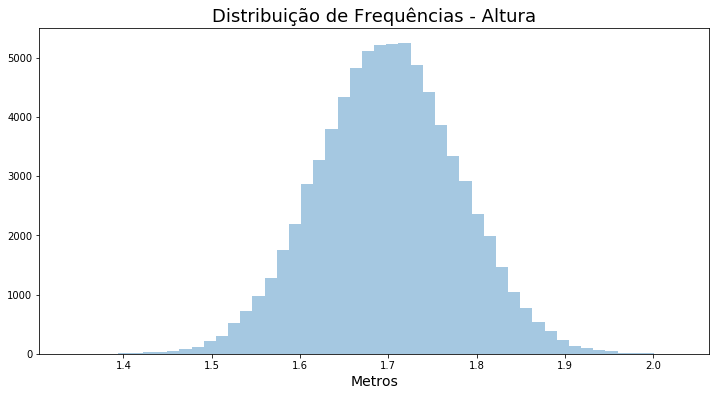

In [0]:
ax = sns.distplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax


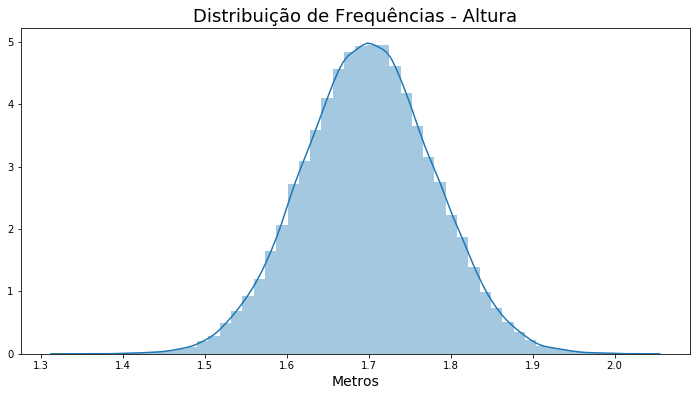

In [0]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

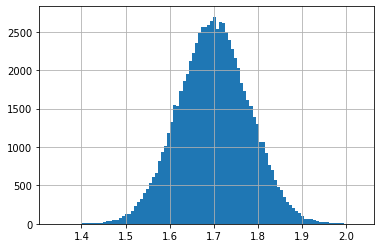

In [0]:
dados.Altura.hist(bins=100)

In [0]:
dist_freq_t

Alturas,Frequência,Frequencia_rel_t
"(1.338, 1.38]",2,0.002603
"(1.38, 1.42]",21,0.027330
"(1.42, 1.461]",91,0.118428
"(1.461, 1.501]",355,0.461999
"(1.501, 1.542]",1372,1.785528
"(1.542, 1.583]",3597,4.681156
"(1.583, 1.623]",7565,9.845133
"(1.623, 1.664]",12064,15.700156
"(1.664, 1.704]",15202,19.783967
"(1.704, 1.745]",14728,19.167100


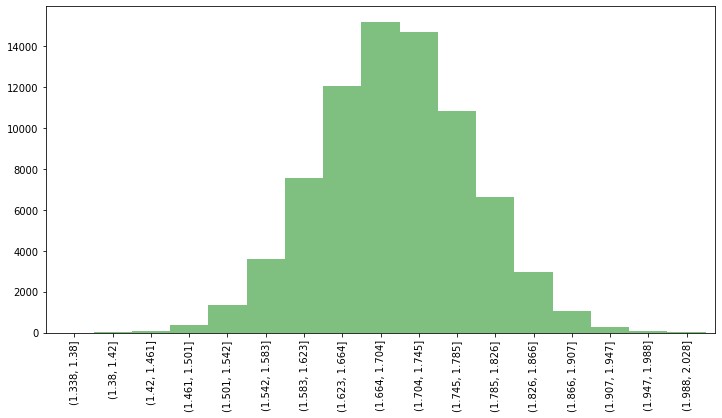

In [0]:
dist_freq_t['Frequência'].plot.bar(width = 1,
                                   color = 'green',
                                   alpha = 0.5,
                                   figsize = (12,6))

## 3. Medidas de Tendência Central

In [0]:
#DataFrame Dado
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', 
               axis = 'columns', 
               inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


### 3.1. Média Aritimética
O centro de massa dos valores de uma variávle, muito afetada por outliers, por isso, pode não ser um boa medida para alguns conjuntos.

In [0]:
print('Média de Fulano:',df['Fulano'].mean())
print('Média de Beltrano:',df['Beltrano'].mean())
print('Média de Sicrano:',df['Sicrano'].mean())

Média de Fulano: 7.714285714285714
Média de Beltrano: 5.142857142857143
Média de Sicrano: 7.714285714285714

In [0]:
#média da renda

dados['Renda'].mean()

Out[193]: 2000.3831988547631

In [0]:
#Média de renda por sexo

dados.groupby('Sexo').mean()['Renda']

Out[194]: Sexo
0 2192.441596
1 1566.847393
Name: Renda, dtype: float64

In [0]:
#Média das Variáveis por sexo

dados.groupby('Sexo').mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


In [0]:
#Calcule a média do conjunto abaixo

dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

print('A média de Idades é:',dataset['Idade'].mean())
print('A média de Idades por sexo é:')
dataset.groupby('Sexo').mean()

,Idade
Sexo,
H,45.750000
M,46.333333


### 3.2. Mediana
O valor que se encontra no meio das oservações. Há alguns passos que devemos seguir antes de tentaremos encontá-la:
1. Ordenar o conjnto de dados
2. Identificar o número de elementos presente na amostra
3. Identificar o lemento mediano

In [0]:
notas_fulano = df.Fulano
notas_fulano

Out[197]: Matemática 8
Português 10
Inglês 4
Geografia 8
História 6
Física 10
Química 8
Name: Fulano, dtype: int64

In [0]:
notas_fulano.sort_values()

Out[198]: Inglês 4
História 6
Matemática 8
Geografia 8
Química 8
Português 10
Física 10
Name: Fulano, dtype: int64

In [0]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Matemática,8
1,Português,10
2,Inglês,4
3,Geografia,8
4,História,6
5,Física,10
6,Química,8


In [0]:
#Encontrar o elemento mediano
n = notas_fulano.shape[0]
med = (n + 1)/2
med

Out[200]: 4.0

In [0]:
#Achando o elemento mediano
print(notas_fulano.loc[med-1])
print(notas_fulano.median())

index Geografia
Fulano 8
Name: 3, dtype: object
Fulano 8.0
dtype: float64

In [0]:
notas_beltrano = df.Beltrano.sample(6, random_state = 101)

#Encontrando o n de observações
n = notas_beltrano.shape[0]

#Colocando índices nos dados
notas_beltrano = notas_beltrano.reset_index()

#Temos um valor par, calculemos a mediana
n1 = list(notas_beltrano.loc[n/2]) #retorna uma lista
n2 = list(notas_beltrano.loc[(n/2)+1])#retorna uma lista

medBeltrano = (n1[1] + n2[1])/2

print(medBeltrano)
print(notas_beltrano.median())

6.5
Beltrano 6.25
dtype: float64

### 3.3. Moda
O valor mais frequente do conjuno de dados

In [0]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [0]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [0]:
dados.Renda.mode()

Out[205]: 0 788
dtype: int32

In [0]:
dados.Altura.mode()

Out[206]: 0 1.568128
1 1.671225
2 1.681659
3 1.692977
4 1.708163
5 1.708370
6 1.753842
7 1.779073
8 1.796462
dtype: float64

In [0]:
dados.Cor.mode()

Out[207]: 0 8
dtype: int32

### 3.4. Relação entre Média, Mediana e Moda
Os principais modelos que podemos analisar com relação a simetria dos dados, são:
1. Assimétrico à direita: moda < mediana < média (força puxando para a direita)
2. Simétrico: moda = mediana = média
3. Assimétrico à esquerda: média < mediana < moda

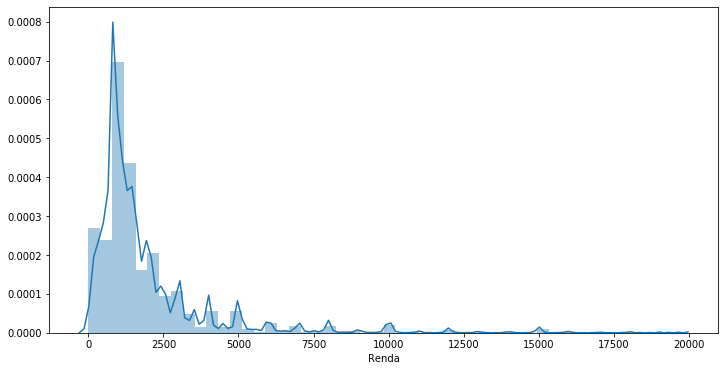

In [0]:
#Analisando a variável renda
ax = sns.distplot(dados.query('Renda<20000').Renda)
ax.figure.set_size_inches(12,6)
ax

In [0]:
modaRenda = dados.Renda.mode()[0]
medianaRenda = dados.Renda.median()
mediaRenda = dados.Renda.mean()
print('Moda:', modaRenda, 'Mediana:', medianaRenda, 'Média:', mediaRenda)
print(modaRenda < medianaRenda < mediaRenda)

Moda: 788 Mediana: 1200.0 Média: 2000.3831988547631
True

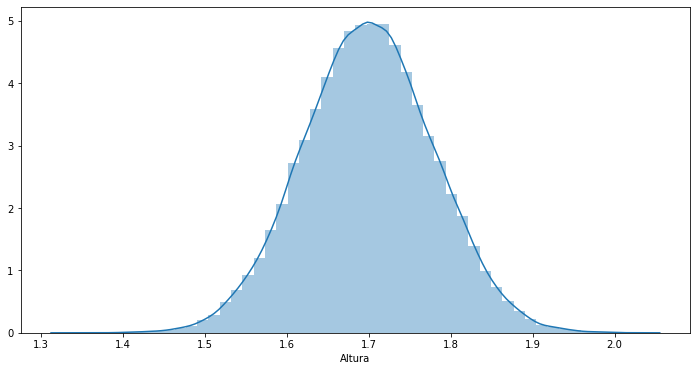

In [0]:
#Analisando a variável altura
ax2 = sns.distplot(dados.Altura)
ax2.figure.set_size_inches(12,6)
ax2

In [0]:
medianaAltura = dados.Altura.median()
mediaAltura = dados.Altura.mean()
modaAltura = dados.Altura.mode()

print(f'Mediana: {medianaAltura}; Média: {mediaAltura}; Moda: {modaAltura}')

Mediana: 1.6993247325; Média: 1.6995124540575741; Moda: 0 1.568128
1 1.671225
2 1.681659
3 1.692977
4 1.708163
5 1.708370
6 1.753842
7 1.779073
8 1.796462
dtype: float64

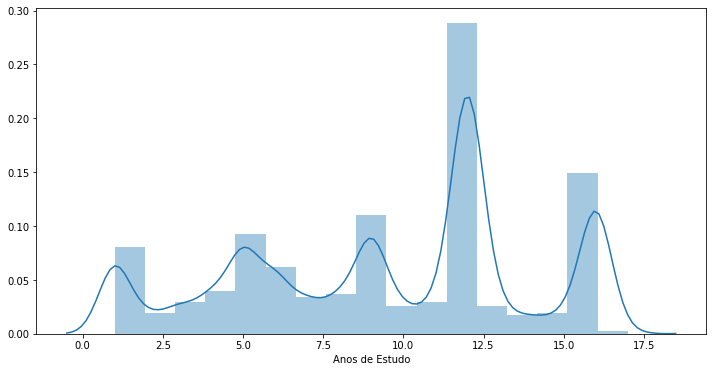

In [0]:
#Analisando a variável anos de estudo
ax3 = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax3.figure.set_size_inches(12,6)
ax3

In [0]:
medianaAnos = dados['Anos de Estudo'].median()
mediaAnos = dados['Anos de Estudo'].mean()
modaAnos = dados['Anos de Estudo'].mode()
print(f'Mediana: {medianaAnos}; Média: {mediaAnos}; Moda: {modaAnos}')
print(mediaAnos < medianaAnos < modaAnos)

Mediana: 11.0; Média: 9.469664237376367; Moda: 0 12
dtype: int32
0 True
dtype: bool

## 4. Medidas Separatrizes
### 4.1. Quartis, Decis e Percentis
Essas medidas não são afetadas por outliers/valores extremos, diferente da média.

In [0]:
dados.Renda.quantile() #mediana

Out[214]: 1200.0

In [0]:
dados.Renda.quantile([0.25,0.5,0.75]) #Quartis

Out[215]: 0.25 788.0
0.50 1200.0
0.75 2000.0
Name: Renda, dtype: float64

In [0]:
dados.Renda.quantile([i/10 for i in range(1,10)])#Decis

Out[216]: 0.1 350.0
0.2 788.0
0.3 800.0
0.4 1000.0
0.5 1200.0
0.6 1500.0
0.7 1900.0
0.8 2500.0
0.9 4000.0
Name: Renda, dtype: float64

In [0]:
dados.Renda.quantile([i/100 for i in range(1,99)])#Percentis

Out[217]: 0.01 0.0
0.02 0.0
0.03 0.0
0.04 50.0
0.05 100.0
 ... 
0.94 5400.0
0.95 6000.0
0.96 7000.0
0.97 8000.0
0.98 10000.0
Name: Renda, Length: 98, dtype: float64

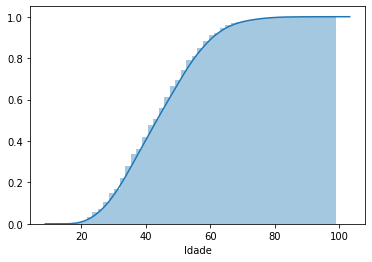

In [0]:
ax = sns.distplot(dados.Idade, 
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})

ax.title('Distribuição de Frequências Acumulada', fontsize = 18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)


### 4.2. Boxplot
representação gráfica muito informativa sobre os nossos dados, informações como: canditados a outliers, IIQ(Intervalo Inter Quartil), Quartis, Limites Superioes e Inferiores

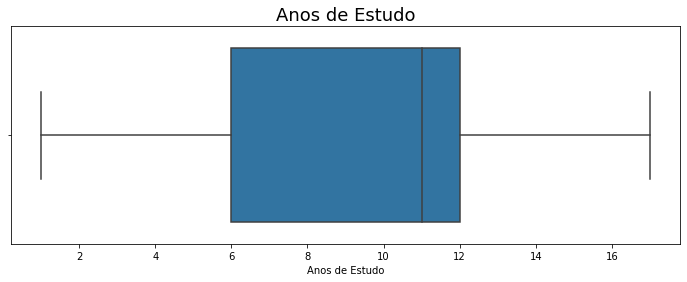

In [0]:
ax = sns.boxplot(x = 'Anos de Estudo', data = dados)
ax.figure.set_size_inches(12,4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_slabel('Anos', fontsize=14)
ax

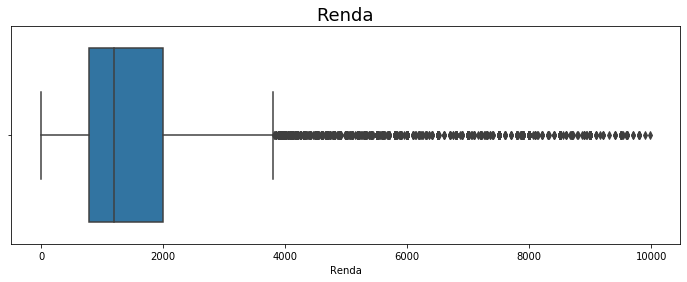

In [0]:
ax = sns.boxplot(x = 'Renda', 
                 data = dados.query('Renda < 10000'))
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_slabel('Renda', fontsize=14)
ax

## 5. Medidas de Dispersão
Medidas de Tenêcnai Central, Medidas Separatrizes, podem não ser o suficiente para descrever os dados. Para auxiliar, temos também as medidas de Dispersão.

### 5.1. Desvio Padrão Absoluto

In [0]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [0]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [0]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

Out[233]: 7.714285714285714

In [0]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [0]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [0]:
notas_fulano['|Desvio|'].mean()

Out[237]: 1.5510204081632648

In [0]:
notas_fulano['Fulano'].mad()

Out[238]: 1.5510204081632648

O Desvio médio absoluto é a média dos valores absolutos dos desvios pardrões.

In [0]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)

print('Desvio Médio Abs. de Fulano:', df['Fulano'].mad(),
      'Desvio Médio Abs. de Sicrano', df['Sicrano'].mad())
     

Desvio Médio Abs. de Fulano: 1.5510204081632648 Desvio Médio Abs. de Sicrano 0.4693877551020408

### 5.2. Variância
Uma observação importante é que a unidade de medidade da variância também será ao quadrado. Isso é solucionado no caso do Desvio Padrão.

In [0]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [0]:
#Variância Amostral (denominador = n - 1)
notas_fulano['(Desvio)^2'].sum()/ (len(notas_fulano) - 1)

Out[245]: 4.57142857142857

In [0]:
notas_fulano['Fulano'].var()

Out[243]: 4.57142857142857

### 5.3. Desvio Padrão

In [0]:
notas_fulano['Fulano'].var()**(1/2)

Out[246]: 2.1380899352993947

In [0]:
notas_fulano['Fulano'].std()

Out[247]: 2.1380899352993947

In [0]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

dataset_mulher = dataset[dataset['Sexo'] == 'M']
print('Std do conjunto todo:', dataset.std())
print('Std das Mulheres:', dataset_mulher.std())

Std do conjunto todo: Idade 14.18489
dtype: float64
Std das Mulheres: Idade 16.64532
dtype: float64